In [1]:
# pip install psycopg2

In [2]:
# Importing Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
import psycopg2
from sqlalchemy import create_engine
from tensorflow import keras
import datetime as dt



Housing Dataset
---------------


**Dataset characteristics:**

    :Number of instances: 54,670

    :Number of Attributes: 12

    :Attribute Information:
 
        -'Single_Family_Median_Typical_Home_Value' Median value of each house type
        -'One_Bedroom_Median_Typical_Home_Value' Median value of one bedroom homes over the entire dataset
        -'Two_Bedroom_Median_Typical_Home_Value' Median value of two bedroom homes over the entire dataset
        -'Three_Bedroom_Median_Typical_Home_Value' Median value of three bedroom homes over the entire dataset
        -'Four_Bedroom_Median_Typical_Home_Value' Median value of four bedroom homes over the entire dataset
        -'Five_Plus_Bedroom_Median_Typical_Home_Value' Median value of five+ bedroom homes over the entire dataset
        -'Estimated_Median_Household_Income' Median household income for the year for the city
        -'2021_estimated_population' Estimated population for the city in 2021
        -'Median_Taxes' Median taxes paid for the household in the city
        -'Median_Rent' Median rent paid in the city for each year
        -'Median_Monthly_Income' Median income divided by 12
        -'Year' The year each metric was observed

    :Missing Attribute Values: none

This dataset was obtained from zillow research data and US census data from 2011 to 2021.

The target variable for the confusion matrix is 'affordability_home_30yr_Payment_20_Perc_Down'



In [3]:
# Import the dataset from the AWS database

from config import engine_url

# Create an engine instance

alchemyEngine   = create_engine(engine_url, pool_recycle=3600);

 

# Connect to PostgreSQL server

dbConnection    = alchemyEngine.connect();

 

# Read data from PostgreSQL database table and load into a DataFrame instance

df       = pd.read_sql("select * from \"master_data_set\"", dbConnection);

 

pd.set_option('display.expand_frame_repr', False);

 

# Print the DataFrame

print(df);

 

# Close the database connection

dbConnection.close();

     Identifier  City_Rank_by_Population(2021)       State State_abbreviation         City Observation_Date  Single_Family_Median_Typical_Home_Value  One_Bedroom_Median_Typical_Home_Value  Two_Bedroom_Median_Typical_Home_Value  Three_Bedroom_Median_Typical_Home_Value  ...  affordability_3br_30yr_Payment_10_Perc_Down  affordability_3br_30yr_Payment_20_Perc_Down  affordability_4br_15yr_Payment_10_Perc_Down  affordability_4br_15yr_Payment_20_Perc_Down  affordability_4br_30yr_Payment_10_Perc_Down  affordability_4br_30yr_Payment_20_Perc_Down  affordability_5_plus_br_15yr_Payment_10_Perc_Down  affordability_5_plus_br_15yr_Payment_20_Perc_Down  affordability_5_plus_br_30yr_Payment_10_Perc_Down  affordability_5_plus_br_30yr_Payment_20_Perc_Down
0        201101                              1    New York                 NY     New York       2011-01-01                                 460824.0                               419555.5                               549450.5                           

In [4]:
df

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,City,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,...,affordability_3br_30yr_Payment_10_Perc_Down,affordability_3br_30yr_Payment_20_Perc_Down,affordability_4br_15yr_Payment_10_Perc_Down,affordability_4br_15yr_Payment_20_Perc_Down,affordability_4br_30yr_Payment_10_Perc_Down,affordability_4br_30yr_Payment_20_Perc_Down,affordability_5_plus_br_15yr_Payment_10_Perc_Down,affordability_5_plus_br_15yr_Payment_20_Perc_Down,affordability_5_plus_br_30yr_Payment_10_Perc_Down,affordability_5_plus_br_30yr_Payment_20_Perc_Down
0,201101,1,New York,NY,New York,2011-01-01,460824.0,419555.5,549450.5,455413.0,...,0.60,0.67,0.36,0.40,0.51,0.58,0.29,0.32,0.41,0.46
1,201201,1,New York,NY,New York,2012-01-01,453166.5,421581.5,549293.0,448447.0,...,0.69,0.77,0.39,0.44,0.59,0.66,0.31,0.35,0.47,0.53
2,201301,1,New York,NY,New York,2013-01-01,467125.5,445182.5,579800.5,461446.5,...,0.66,0.74,0.38,0.43,0.56,0.63,0.30,0.34,0.44,0.50
3,201401,1,New York,NY,New York,2014-01-01,499898.0,487199.5,634870.5,493995.0,...,0.61,0.69,0.36,0.40,0.51,0.58,0.28,0.31,0.40,0.45
4,201501,1,New York,NY,New York,2015-01-01,526189.0,536285.0,689511.5,522588.5,...,0.63,0.71,0.36,0.40,0.53,0.59,0.27,0.30,0.40,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,201775,75,New Jersey,NJ,Jersey City,2017-01-01,408525.0,471067.5,537922.5,458794.5,...,0.84,0.95,0.59,0.66,0.87,0.98,0.55,0.61,0.81,0.91
777,201875,75,New Jersey,NJ,Jersey City,2018-01-01,459463.0,503269.5,568473.0,501645.0,...,0.79,0.89,0.55,0.62,0.80,0.90,0.50,0.57,0.73,0.82
778,201975,75,New Jersey,NJ,Jersey City,2019-01-01,489001.0,490562.5,566059.0,523939.5,...,0.91,1.03,0.60,0.68,0.90,1.02,0.56,0.62,0.83,0.94
779,202075,75,New Jersey,NJ,Jersey City,2020-01-01,514131.5,487710.5,570039.5,541306.0,...,0.92,1.03,0.58,0.65,0.90,1.02,0.52,0.59,0.82,0.92


In [5]:
# Create a list of targets for the neural network

columns_list = df.columns.to_list()

target_list = columns_list[45:]

target_list

['affordability_rent',
 'affordability_home_15yr_Payment_10_Perc_Down',
 'affordability_home_15yr_Payment_20_Perc_Down',
 'affordability_home_30yr_Payment_10_Perc_Down',
 'affordability_home_30yr_Payment_20_Perc_Down',
 'affordability_1br_15yr_Payment_10_Perc_Down',
 'affordability_1br_15yr_Payment_20_Perc_Down',
 'affordability_1br_30yr_Payment_10_Perc_Down',
 'affordability_1br_30yr_Payment_20_Perc_Down',
 'affordability_2br_15yr_Payment_10_Perc_Down',
 'affordability_2br_15yr_Payment_20_Perc_Down',
 'affordability_2br_30yr_Payment_10_Perc_Down',
 'affordability_2br_30yr_Payment_20_Perc_Down',
 'affordability_3br_15yr_Payment_10_Perc_Down',
 'affordability_3br_15yr_Payment_20_Perc_Down',
 'affordability_3br_30yr_Payment_10_Perc_Down',
 'affordability_3br_30yr_Payment_20_Perc_Down',
 'affordability_4br_15yr_Payment_10_Perc_Down',
 'affordability_4br_15yr_Payment_20_Perc_Down',
 'affordability_4br_30yr_Payment_10_Perc_Down',
 'affordability_4br_30yr_Payment_20_Perc_Down',
 'affordabili

In [6]:
# Change affordability to 0 or 1 in the target columns

df[target_list] = np.where(df[target_list]>=1.00,1, 0)
df

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,City,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,...,affordability_3br_30yr_Payment_10_Perc_Down,affordability_3br_30yr_Payment_20_Perc_Down,affordability_4br_15yr_Payment_10_Perc_Down,affordability_4br_15yr_Payment_20_Perc_Down,affordability_4br_30yr_Payment_10_Perc_Down,affordability_4br_30yr_Payment_20_Perc_Down,affordability_5_plus_br_15yr_Payment_10_Perc_Down,affordability_5_plus_br_15yr_Payment_20_Perc_Down,affordability_5_plus_br_30yr_Payment_10_Perc_Down,affordability_5_plus_br_30yr_Payment_20_Perc_Down
0,201101,1,New York,NY,New York,2011-01-01,460824.0,419555.5,549450.5,455413.0,...,0,0,0,0,0,0,0,0,0,0
1,201201,1,New York,NY,New York,2012-01-01,453166.5,421581.5,549293.0,448447.0,...,0,0,0,0,0,0,0,0,0,0
2,201301,1,New York,NY,New York,2013-01-01,467125.5,445182.5,579800.5,461446.5,...,0,0,0,0,0,0,0,0,0,0
3,201401,1,New York,NY,New York,2014-01-01,499898.0,487199.5,634870.5,493995.0,...,0,0,0,0,0,0,0,0,0,0
4,201501,1,New York,NY,New York,2015-01-01,526189.0,536285.0,689511.5,522588.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,201775,75,New Jersey,NJ,Jersey City,2017-01-01,408525.0,471067.5,537922.5,458794.5,...,0,0,0,0,0,0,0,0,0,0
777,201875,75,New Jersey,NJ,Jersey City,2018-01-01,459463.0,503269.5,568473.0,501645.0,...,0,0,0,0,0,0,0,0,0,0
778,201975,75,New Jersey,NJ,Jersey City,2019-01-01,489001.0,490562.5,566059.0,523939.5,...,0,1,0,0,0,1,0,0,0,0
779,202075,75,New Jersey,NJ,Jersey City,2020-01-01,514131.5,487710.5,570039.5,541306.0,...,0,1,0,0,0,1,0,0,0,0


In [7]:
# Encode each city into its own column

# enc = OneHotEncoder(sparse=False)
# encode_df = pd.DataFrame(enc.fit_transform(df[['City']]))
# encode_df.columns=enc.get_feature_names_out(['City'])

In [8]:
# Merge the encoded city columns and drop the City column

# df = df.merge(encode_df, left_index=True, right_index=True)
# df.drop(columns=['City'], inplace=True)

In [9]:
# Change the observation date to year

df['Observation_Date'] = pd.to_datetime(df['Observation_Date'])
df['Year'] = df['Observation_Date'].dt.year

In [10]:
# Create a dataset for 2021 to test the model's ability to predict affordability

df_eval = df.loc[df['Year']==2021]
df_eval

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,City,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,...,affordability_3br_30yr_Payment_20_Perc_Down,affordability_4br_15yr_Payment_10_Perc_Down,affordability_4br_15yr_Payment_20_Perc_Down,affordability_4br_30yr_Payment_10_Perc_Down,affordability_4br_30yr_Payment_20_Perc_Down,affordability_5_plus_br_15yr_Payment_10_Perc_Down,affordability_5_plus_br_15yr_Payment_20_Perc_Down,affordability_5_plus_br_30yr_Payment_10_Perc_Down,affordability_5_plus_br_30yr_Payment_20_Perc_Down,Year
10,202101,1,New York,NY,New York,2021-01-01,706417.0,603709.0,751189.0,690397.5,...,0,0,0,0,0,0,0,0,0,2021
21,202102,2,California,CA,Los Angeles,2021-01-01,937656.5,575026.0,746089.5,860336.5,...,0,0,0,0,0,0,0,0,0,2021
32,202103,3,Illinois,IL,Chicago,2021-01-01,282580.0,236544.5,284521.5,291592.0,...,1,0,0,1,1,0,0,1,1,2021
43,202104,4,Texas,TX,Houston,2021-01-01,229725.5,132536.0,168663.5,210146.0,...,1,0,0,1,1,0,0,0,0,2021
54,202105,5,Arizona,AZ,Phoenix,2021-01-01,359291.5,216523.0,277632.0,340718.0,...,1,0,0,1,1,0,0,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,202171,71,Nebraska,NE,Lincoln,2021-01-01,239984.0,202191.0,192750.0,240544.5,...,1,0,0,1,1,0,0,1,1,2021
747,202172,72,Texas,TX,Plano,2021-01-01,418720.0,201140.5,291360.0,343630.0,...,1,0,0,1,1,0,0,1,1,2021
758,202173,73,Alaska,AK,Anchorage,2021-01-01,386293.5,182718.5,233835.5,348141.5,...,1,0,0,1,1,0,0,1,1,2021
769,202174,74,North Carolina,NC,Durham,2021-01-01,314496.5,211638.0,229229.5,292391.5,...,1,0,0,1,1,0,0,0,1,2021


In [11]:
# Create a dataset from 2011-2020 to train the neural network

df_train= df.loc[df['Year']!=2021]
df_train

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,City,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,...,affordability_3br_30yr_Payment_20_Perc_Down,affordability_4br_15yr_Payment_10_Perc_Down,affordability_4br_15yr_Payment_20_Perc_Down,affordability_4br_30yr_Payment_10_Perc_Down,affordability_4br_30yr_Payment_20_Perc_Down,affordability_5_plus_br_15yr_Payment_10_Perc_Down,affordability_5_plus_br_15yr_Payment_20_Perc_Down,affordability_5_plus_br_30yr_Payment_10_Perc_Down,affordability_5_plus_br_30yr_Payment_20_Perc_Down,Year
0,201101,1,New York,NY,New York,2011-01-01,460824.0,419555.5,549450.5,455413.0,...,0,0,0,0,0,0,0,0,0,2011
1,201201,1,New York,NY,New York,2012-01-01,453166.5,421581.5,549293.0,448447.0,...,0,0,0,0,0,0,0,0,0,2012
2,201301,1,New York,NY,New York,2013-01-01,467125.5,445182.5,579800.5,461446.5,...,0,0,0,0,0,0,0,0,0,2013
3,201401,1,New York,NY,New York,2014-01-01,499898.0,487199.5,634870.5,493995.0,...,0,0,0,0,0,0,0,0,0,2014
4,201501,1,New York,NY,New York,2015-01-01,526189.0,536285.0,689511.5,522588.5,...,0,0,0,0,0,0,0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,201675,75,New Jersey,NJ,Jersey City,2016-01-01,365580.5,433664.0,495381.5,410903.0,...,1,0,0,0,1,0,0,0,1,2016
776,201775,75,New Jersey,NJ,Jersey City,2017-01-01,408525.0,471067.5,537922.5,458794.5,...,0,0,0,0,0,0,0,0,0,2017
777,201875,75,New Jersey,NJ,Jersey City,2018-01-01,459463.0,503269.5,568473.0,501645.0,...,0,0,0,0,0,0,0,0,0,2018
778,201975,75,New Jersey,NJ,Jersey City,2019-01-01,489001.0,490562.5,566059.0,523939.5,...,1,0,0,0,1,0,0,0,0,2019


In [12]:
# Creating a list of features for the neural network

columns_list = df.columns.tolist()
columns_list

remove_list = ['Identifier',
 'City_Rank_by_Population(2021)',
 'State',
 'State_abbreviation',
 'City',
 'Observation_Date',
 '2020_census',
 'AnnualAverageRate15Year',
 'AnnualAverageRate30Year',
 'home_15yr_Payment_10_Perc_Down',
 'home_15yr_Payment_20_Perc_Down',
 'home_30yr_Payment_10_Perc_Down',
 'home_30yr_Payment_20_Perc_Down',
 '1br_15yr_Payment_10_Perc_Down',
 '1br_15yr_Payment_20_Perc_Down',
 '1br_30yr_Payment_10_Perc_Down',
 '1br_30yr_Payment_20_Perc_Down',
 '2br_15yr_Payment_10_Perc_Down',
 '2br_15yr_Payment_20_Perc_Down',
 '2br_30yr_Payment_10_Perc_Down',
 '2br_30yr_Payment_20_Perc_Down',
 '3br_15yr_Payment_10_Perc_Down',
 '3br_15yr_Payment_20_Perc_Down',
 '3br_30yr_Payment_10_Perc_Down',
 '3br_30yr_Payment_20_Perc_Down',
 '4br_15yr_Payment_10_Perc_Down',
 '4br_15yr_Payment_20_Perc_Down',
 '4br_30yr_Payment_10_Perc_Down',
 '4br_30yr_Payment_20_Perc_Down',
 '5_plus_br_15yr_Payment_10_Perc_Down',
 '5_plus_br_15yr_Payment_20_Perc_Down',
 '5_plus_br_30yr_Payment_10_Perc_Down',
 '5_plus_br_30yr_Payment_20_Perc_Down',
 'affordability_rent',
 'affordability_home_15yr_Payment_10_Perc_Down',
 'affordability_home_15yr_Payment_20_Perc_Down',
 'affordability_home_30yr_Payment_10_Perc_Down',
 'affordability_home_30yr_Payment_20_Perc_Down',
 'affordability_1br_15yr_Payment_10_Perc_Down',
 'affordability_1br_15yr_Payment_20_Perc_Down',
 'affordability_1br_30yr_Payment_10_Perc_Down',
 'affordability_1br_30yr_Payment_20_Perc_Down',
 'affordability_2br_15yr_Payment_10_Perc_Down',
 'affordability_2br_15yr_Payment_20_Perc_Down',
 'affordability_2br_30yr_Payment_10_Perc_Down',
 'affordability_2br_30yr_Payment_20_Perc_Down',
 'affordability_3br_15yr_Payment_10_Perc_Down',
 'affordability_3br_15yr_Payment_20_Perc_Down',
 'affordability_3br_30yr_Payment_10_Perc_Down',
 'affordability_3br_30yr_Payment_20_Perc_Down',
 'affordability_4br_15yr_Payment_10_Perc_Down',
 'affordability_4br_15yr_Payment_20_Perc_Down',
 'affordability_4br_30yr_Payment_10_Perc_Down',
 'affordability_4br_30yr_Payment_20_Perc_Down',
 'affordability_5_plus_br_15yr_Payment_10_Perc_Down',
 'affordability_5_plus_br_15yr_Payment_20_Perc_Down',
 'affordability_5_plus_br_30yr_Payment_10_Perc_Down',
 'affordability_5_plus_br_30yr_Payment_20_Perc_Down',
  'Monthly_Affordability_Limit']

for metric in remove_list:
    columns_list.remove(metric)

columns_list

# x_columns = ['Year','Estimated_Median_Household_Income', '2021_estimated_population', '2020_census', 'Median_Taxes', 'Median_Rent', 'AnnualAverageRate30Year','Median_Monthly_Income','Monthly_Affordability_Limit'] 
# 'home_30yr_Payment_20_Perc_Down', '1br_30yr_Payment_20_Perc_Down', '2br_30yr_Payment_20_Perc_Down', 
# '3br_30yr_Payment_20_Perc_Down', '4br_30yr_Payment_20_Perc_Down', '5_plus_br_30yr_Payment_20_Perc_Down', 'Median_Monthly_Income', 'Monthly_Affordability_Limit'




# y=df['affordability_home_30yr_Payment_20_Perc_Down']

['Single_Family_Median_Typical_Home_Value',
 'One_Bedroom_Median_Typical_Home_Value',
 'Two_Bedroom_Median_Typical_Home_Value',
 'Three_Bedroom_Median_Typical_Home_Value',
 'Four_Bedroom_Median_Typical_Home_Value',
 'Five_Plus_Bedroom_Median_Typical_Home_Value',
 'Estimated_Median_Household_Income',
 '2021_estimated_population',
 'Median_Taxes',
 'Median_Rent',
 'Median_Monthly_Income',
 'Year']

In [13]:
# Determining input dimensions
len(columns_list)

12

In [14]:
# Creating the feature group
X = df_train[columns_list]

In [15]:
# Testing the features in a test, train split group

for target in target_list:
    y=df_train[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    nn_model = tf.keras.models.Sequential()
    nn_model.add(tf.keras.layers.Dense(units=24, activation="relu", input_dim=12))
    nn_model.add(tf.keras.layers.Dense(units=12, activation="relu"))
    # nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


    # Train the model
    fit_model = nn_model.fit(X_train_scaled, y_train, epochs=10)

    # Evaluate the model using the test data
    model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/10
17/17 [==============================] - 1s 997us/step - loss: 0.6983 - accuracy: 0.4624
Epoch 2/10
17/17 [==============================] - 0s 810us/step - loss: 0.5554 - accuracy: 0.8910
Epoch 3/10
17/17 [==============================] - 0s 810us/step - loss: 0.4568 - accuracy: 0.9474
Epoch 4/10
17/17 [==============================] - 0s 873us/step - loss: 0.3804 - accuracy: 0.9398
Epoch 5/10
17/17 [==============================] - 0s 904us/step - loss: 0.3162 - accuracy: 0.9398
Epoch 6/10
17/17 [==============================] - 0s 810us/step - loss: 0.2711 - accuracy: 0.9398
Epoch 7/10
17/17 [==============================] - 0s 873us/step - loss: 0.2398 - accuracy: 0.9398
Epoch 8/10
17/17 [==============================] - 0s 873us/step - loss: 0.2169 - accuracy: 0.9398
Epoch 9/10
17/17 [==============================] - 0s 935us/step - loss: 0.2015 - accuracy: 0.9398
Epoch 10/10
17/17 [==============================] - 0s 873us/step - loss: 0.1866 - accuracy: 0.9398

Make Model from 2011-2020

In [16]:
# Scaling the data from 2011 to 2020

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)


In [17]:
#Creating data models for each target based on the complete data from 2011 to 2020

for target in target_list:
    y=df_train[target]

    #Build Dense layers for neural network
    nn_model = tf.keras.models.Sequential()
    nn_model.add(tf.keras.layers.Dense(units=24, activation="relu", input_dim=12))
    nn_model.add(tf.keras.layers.Dense(units=12, activation="relu"))
    # nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


    # Train the model
    fit_model = nn_model.fit(X_scaled, y, epochs=10)

    # Evaluate the model
    model_loss, model_accuracy = nn_model.evaluate(X_scaled, y ,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print(nn_model.summary())
    nn_model.save("./Models/Optimized/"+ target +"_model.h5")


Epoch 1/10
23/23 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7465
Epoch 2/10
23/23 [==============================] - 0s 816us/step - loss: 0.4251 - accuracy: 0.9380
Epoch 3/10
23/23 [==============================] - 0s 771us/step - loss: 0.3372 - accuracy: 0.9437
Epoch 4/10
23/23 [==============================] - 0s 839us/step - loss: 0.2737 - accuracy: 0.9437
Epoch 5/10
23/23 [==============================] - 0s 861us/step - loss: 0.2299 - accuracy: 0.9437
Epoch 6/10
23/23 [==============================] - 0s 816us/step - loss: 0.2019 - accuracy: 0.9437
Epoch 7/10
23/23 [==============================] - 0s 771us/step - loss: 0.1803 - accuracy: 0.9437
Epoch 8/10
23/23 [==============================] - 0s 816us/step - loss: 0.1633 - accuracy: 0.9437
Epoch 9/10
23/23 [==============================] - 0s 952us/step - loss: 0.1460 - accuracy: 0.9437
Epoch 10/10
23/23 [==============================] - 0s 907us/step - loss: 0.1305 - accuracy: 0.9479
2

In [18]:
# Evaluating the last model created

y_eval = pd.DataFrame(nn_model.predict(df_eval[columns_list]))
y_eval.value_counts()

3/3 [==============================] - 0s 897us/step


0.0    71
dtype: int64

In [19]:
# Load specific model
model = keras.models.load_model('./Models/Optimized/affordability_home_30yr_Payment_20_Perc_Down_model.h5')


In [20]:
# Scale evaluation data

X = df_eval[columns_list]
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [21]:
# Predict the affordability using the chosen model

y_eval = pd.DataFrame(model.predict(X_scaled))
y_eval.value_counts()

3/3 [==============================] - 0s 998us/step


0.000026    1
0.993160    1
0.994314    1
0.994282    1
0.993819    1
           ..
0.905976    1
0.902534    1
0.865850    1
0.857431    1
0.999685    1
Length: 71, dtype: int64

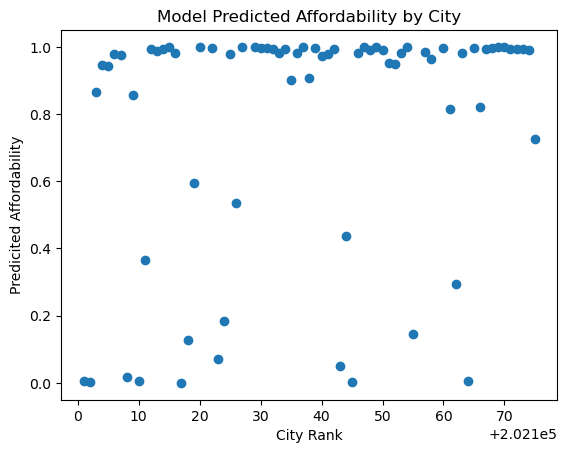

<Figure size 2000x1000 with 0 Axes>

In [22]:
# Plot the affordability by city

plt.scatter(df_eval["Identifier"], y_eval)
plt.title("Model Predicted Affordability by City")
plt.xlabel("City Rank")
plt.ylabel("Predicited Affordability")
fig1 = plt.figure(figsize=(20,10))
fig1.savefig('./Models/y_eval.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# Create a predictions list
predictions = y_eval.values

In [24]:
# Add model predictions to the evaluation dataset
df_eval['Predictions'] = predictions

C:\Users\mattw\AppData\Local\Temp\ipykernel_33264\78421546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Predictions'] = predictions


In [25]:
df_eval

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,City,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,...,affordability_4br_15yr_Payment_10_Perc_Down,affordability_4br_15yr_Payment_20_Perc_Down,affordability_4br_30yr_Payment_10_Perc_Down,affordability_4br_30yr_Payment_20_Perc_Down,affordability_5_plus_br_15yr_Payment_10_Perc_Down,affordability_5_plus_br_15yr_Payment_20_Perc_Down,affordability_5_plus_br_30yr_Payment_10_Perc_Down,affordability_5_plus_br_30yr_Payment_20_Perc_Down,Year,Predictions
10,202101,1,New York,NY,New York,2021-01-01,706417.0,603709.0,751189.0,690397.5,...,0,0,0,0,0,0,0,0,2021,0.004790
21,202102,2,California,CA,Los Angeles,2021-01-01,937656.5,575026.0,746089.5,860336.5,...,0,0,0,0,0,0,0,0,2021,0.002038
32,202103,3,Illinois,IL,Chicago,2021-01-01,282580.0,236544.5,284521.5,291592.0,...,0,0,1,1,0,0,1,1,2021,0.865850
43,202104,4,Texas,TX,Houston,2021-01-01,229725.5,132536.0,168663.5,210146.0,...,0,0,1,1,0,0,0,0,2021,0.946084
54,202105,5,Arizona,AZ,Phoenix,2021-01-01,359291.5,216523.0,277632.0,340718.0,...,0,0,1,1,0,0,0,0,2021,0.943489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,202171,71,Nebraska,NE,Lincoln,2021-01-01,239984.0,202191.0,192750.0,240544.5,...,0,0,1,1,0,0,1,1,2021,0.994900
747,202172,72,Texas,TX,Plano,2021-01-01,418720.0,201140.5,291360.0,343630.0,...,0,0,1,1,0,0,1,1,2021,0.993408
758,202173,73,Alaska,AK,Anchorage,2021-01-01,386293.5,182718.5,233835.5,348141.5,...,0,0,1,1,0,0,1,1,2021,0.993160
769,202174,74,North Carolina,NC,Durham,2021-01-01,314496.5,211638.0,229229.5,292391.5,...,0,0,1,1,0,0,0,1,2021,0.991892


In [26]:
# Change the raw predicted values to match formatting of actual

df_eval['Predictions'] = np.where(df_eval["Predictions"]>=0.5, 1, 0)


df_eval['affordability_home_30yr_Payment_20_Perc_Down'].value_counts()

C:\Users\mattw\AppData\Local\Temp\ipykernel_33264\2248695812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Predictions'] = np.where(df_eval["Predictions"]>=0.5, 1, 0)


1    56
0    15
Name: affordability_home_30yr_Payment_20_Perc_Down, dtype: int64

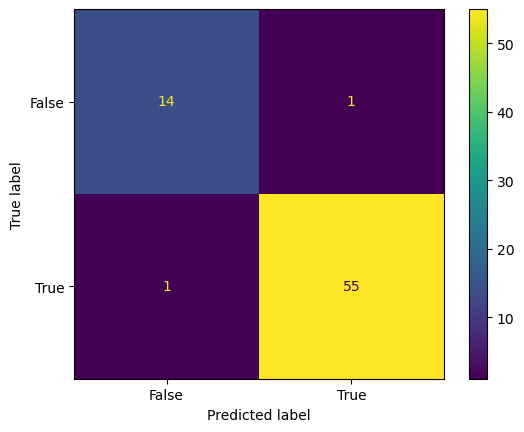

In [27]:
# Confusion Matrix

actual = df_eval['affordability_home_30yr_Payment_20_Perc_Down']
predicted = df_eval['Predictions']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [28]:
# Metrics Calculation
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted) 

print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score}) 

{'Accuracy': 0.971830985915493, 'Precision': 0.9821428571428571, 'Sensitivity_recall': 0.9821428571428571, 'Specificity': 0.9333333333333333, 'F1_score': 0.9821428571428571}
